# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
df = pd.read_csv('food_claims_2212.csv')

In [61]:
# overview of columns and values
variables = pd.DataFrame(columns=['Variable', 'Number of unique values', 'Values', 'Number of NaN'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist(), df[var].isna().sum()]

variables

,Variable,Number of unique values,Values,Number of NaN
0,claim_id,2000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0
1,time_to_close,256,"[317, 195, 183, 186, 138, 190, 149, 180, 208, ...",0
2,claim_amount,2000,"[R$ 74474.55, R$ 52137.83, R$ 24447.2, R$ 2900...",0
3,amount_paid,1963,"[51231.37, 42111.3, 23986.3, 27942.72, 16251.0...",36
4,location,4,"[RECIFE, FORTALEZA, SAO LUIS, NATAL]",0
5,individuals_on_claim,15,"[15, 12, 10, 11, 8, 9, 6, 7, 13, 4, 2, 3, 14, ...",0
6,linked_cases,2,"[False, True, nan]",26
7,cause,5,"[unknown, meat, vegetable, Meat, VEGETABLES]",0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


## 1. For every column in the data:
### a. State whether the values match the description given in the table above.
### b. State the number of missing values in the column.
### c. Describe what you did to make values match the description if they did not
### match.



The dataset contains 2000 rows and 8 columns. Overall, only 2 columns had null values: **amount_paid** and **linked_cases**. 

I also noticed that **claim_amount** was a string and not a float number. To fix that, i replaced "R$" with a blank and converted it:

In [63]:
df['claim_amount'] = df['claim_amount'].str.replace('R\$', "", regex=True).astype(float)
df['claim_amount'].head()

0    74474.55
1    52137.83
2    24447.20
3    29006.28
4    19520.60
Name: claim_amount, dtype: float64

The **amount_paid** column had 36 null values. I replaced these values with the median of the column, as the instructions indicated:

In [64]:
df['amount_paid'].isna().sum()

36

In [65]:
df['amount_paid'].fillna(round(df['amount_paid'].median(), 2), inplace=True)
df['amount_paid'].isna().sum()

0

The **linked_cases** column also had missing values. Those were replaced with False:

In [66]:
df['linked_cases'].isna().sum()

26

In [67]:
df['linked_cases'].fillna(False, inplace=True)
df['linked_cases'].isna().sum()

0

The **cause** column had no missing values, but the values in the column were not standardized. i fixed those by replacing those values:

In [68]:
df['cause'].value_counts()

meat          943
unknown       713
vegetable     314
VEGETABLES     16
 Meat          14
Name: cause, dtype: int64

In [69]:
df['cause'] = df['cause'].str.lower()
df['cause'] = df['cause'].str.strip(' ')
df['cause'] = df['cause'].str.replace('vegetables', 'vegetable')
df['cause'].value_counts()

meat         957
unknown      713
vegetable    330
Name: cause, dtype: int64

To summarize:

**claim_id**: no missing values, no duplicates, no duplicates

**time_to_close**: no negative values, no missing values,

**claim_amount**: removed currency sign and converted to float

**amount_paid**: replaced nulls with column median

**location**: no missing values, 4 distinct values as expected

**individuals_on_claim**: no negative values, lowest value is 1, no missing values

**linked_cases**: filled nulls with False, 

**cause**: replaced and transformed values into the 3 informed categories: "meat", "vegetable" and "unknown"



## 2 Create a visualization that shows the number of claims in each location. Use the visualization to:
### a. State which category of the variable location has the most observations

### b. Explain whether the observations are balanced across categories of the
### variable location


**Recife** is clearly above the other locations in terms of number of claims processed, with nearly **45%** of all claims. This graph shows our dataset is not balanced, since **Fortaleza** and **Natal** together account only for 598 claims, which is barely above the average of 500 per location and barely above the **Sao Luis** offices. Its hard to pinpoint the reason for this discrepancy in our numbers, but its clear the Recife office processes a lot more claims than the rest.

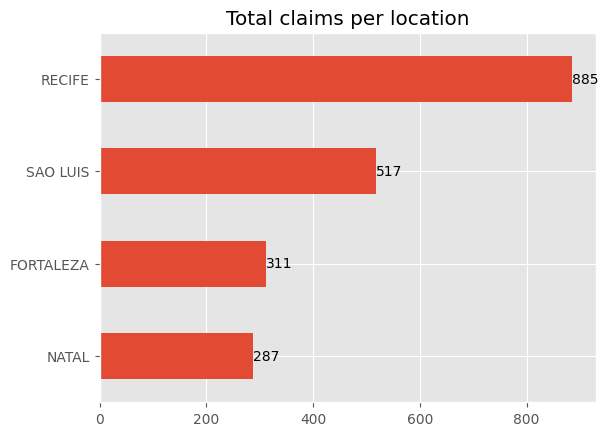

In [70]:
df['location'].value_counts().sort_values().plot(kind='barh')
for i, v in enumerate(df['location'].value_counts().sort_values()):
    plt.annotate(str(v), xy=(v + 0.5, i), va='center')
plt.title("Total claims per location")
plt.show()

## 3. Describe the distribution of time to close for all claims. 
### Your answer must include a visualization that shows the distribution.

As we can see below, the majority of claims (about 50%) were closed within a range of 158-204 days. The distribution appears to be somewhat right-skewed, as the maximum is farther from the mean than the minimum.



In [71]:
df['time_to_close'].describe()

count    2000.00000
mean      185.56800
std        49.16339
min        76.00000
25%       158.00000
50%       179.00000
75%       204.00000
max       518.00000
Name: time_to_close, dtype: float64

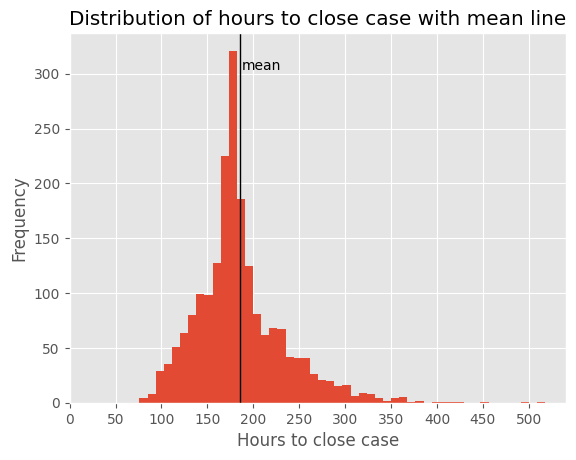

In [72]:
df['time_to_close'].hist(bins=50)
plt.axvline(df['time_to_close'].mean(), color='black', linewidth=1)
plt.text(df['time_to_close'].mean() + 2, plt.ylim()[1]*0.9, 'mean', color='black')
plt.xlabel('Hours to close case')
plt.ylabel("Frequency")
plt.title('Distribution of hours to close case with mean line')
plt.xticks(range(0, 501, 50))
plt.show()

However, we do have a lot of values above the 95th percentile, which might indicate that we have a few outliers to consider. This is specially visible with a boxplot:



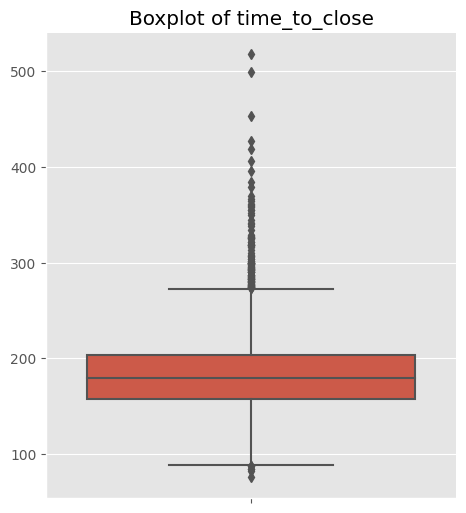

In [73]:
sns.catplot(y='time_to_close',
            data=df,
            kind='box')
plt.title("Boxplot of time_to_close")
plt.ylabel("")
plt.show()

## 4. Describe the relationship between time to close and location. 
### Your answer must include a visualization to demonstrate the relationship

Nothing truly significant jumps out when we look at the boxplot of each location. The mean time to close is relatively similar across all four locations. We can see how the Q1, Q2 and Q3 (the three lines of the box) are all very close to each among locations.

However, there is some variation in the spread of the data, with Sao Luis being the most obvious case. Additionally, each location has a different range of values, with Sao Luis having the highest maximum value of 518 and Fortaleza having the lowest minimum value of 76.

In [74]:
df.groupby('location').mean()['time_to_close']

location
FORTALEZA    185.305466
NATAL        185.926829
RECIFE       184.607910
SAO LUIS     187.170213
Name: time_to_close, dtype: float64

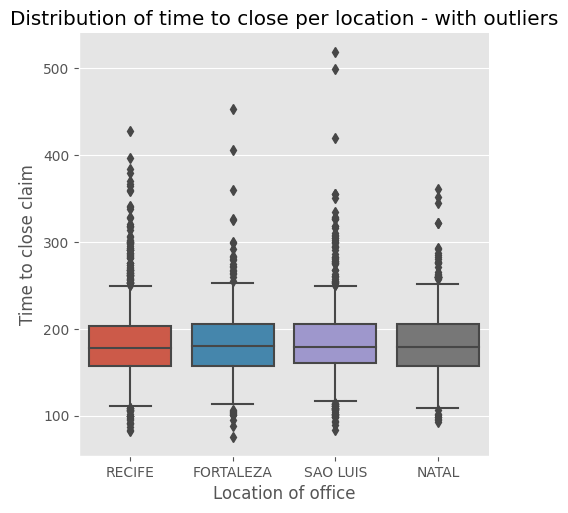

In [75]:
sns.catplot(x='location',
            y='time_to_close',
            data=df,
            kind='box',
            whis=1.0)
plt.ylabel("Time to close claim")
plt.xlabel("Location of office")
plt.title("Distribution of time to close per location - with outliers")
plt.show()

As we mentioned before, we have quite a few outliers in our data. If we remove the values above the bottom and top whiskers, we can see that the distribution of data per location is very similar:

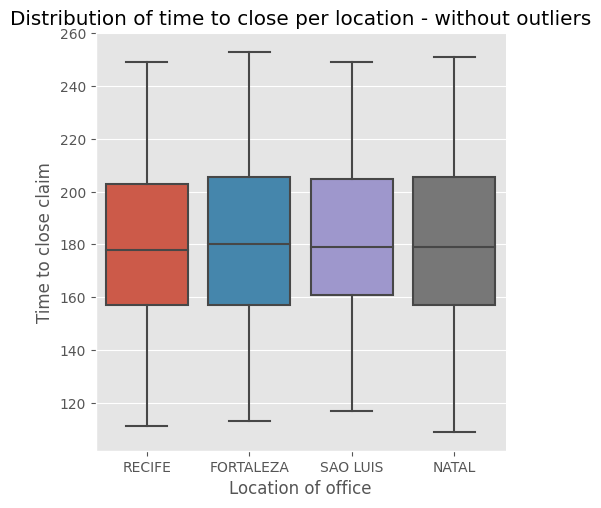

In [76]:
sns.catplot(x='location',
            y='time_to_close',
            data=df,
            kind='box',
            sym='', 
            whis=1.0)
plt.ylabel("Time to close claim")
plt.xlabel("Location of office")
plt.title("Distribution of time to close per location - without outliers")
plt.show()

Overall, it seems that there may be some variation in the time to close between locations, but without additional information or analysis it is difficult to draw any definitive conclusions. We know that Fortaleza has the most claims processed by a wide margin, but its time to close each claim is faily similar to the other locations. Its hard to tell if thats because they are more efficient or if the other offices are not.

Given that "the head of the legal department wants a report on how each location differs in the time it takes to close claims", it might be interesting to investigate deeper these different offices, looking at the number of people per office to see or number of people working per claim. That way, it might be possible to draw better conclusions about the time to close claims.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam